# Neural Network( MLP)

## Contents

* Introduction
* Application on dataset


## Introduction

The Multi-Layer Perceptron (MLP) is a type of neural network that is widely used in machine learning. It is a feedforward neural network, meaning that the information flows through the network in only one direction, from the input layer to the output layer.As a feedforward neural network, it only allows for one direction of information flow—from the input layer to the output layer.

Each layer of neurons in the MLP is completely linked to the layer below it. The model's ultimate output is produced by the output layer, which also receives the model's initial input data. The complicated patterns and relationships in the data are learned by the hidden layers, which also carry out the intermediate computations.

Each neuron in the MLP gets input from the layer above, calculates a weighted sum, adds a bias term, and then passes the finished calculation via an activation function to produce an output. During training, the neurons' weights and biases are modified using an optimization approach such stochastic gradient descent.

The activation function provides non-linearity into the model, enabling it to learn intricate non-linear correlations in the data. As a result, it is a crucial component of the MLP. The sigmoid function, ReLU function, and hyperbolic tangent function are a few examples of regularly used activation functions.

The MLP is an effective machine learning model that may be applied to a variety of applications, such as speech recognition, image classification, and natural language processing. However, training an MLP can be challenging because it needs a lot of labeled data and careful consideration when choosing hyperparameters like the number of hidden layers and neurons in each layer.

<img src="./Desktop/semester2/577_github/neuron.png" width="200" height="200">

## Networks of Neurons

Neurons are arranged into networks of neurons. A row of neurons is called a layer, and one network can have multiple layers. The architecture of the neurons in the network is often called the network topology.


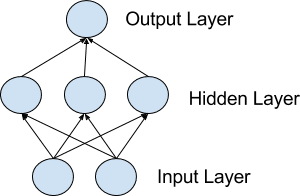

Based on the biological neuron model, we can get the basic structure of the multi-layer perceptron MLP. The most typical MLP includes three layers: input layer, hidden layer and output layer. The different layers of the MLP neural network are fully connected (fully connected This means that any neuron in the previous layer is connected to all neurons in the next layer).

It can be seen that neural networks have three main basic elements: weights, biases and activation functions

Weights: The strength of the connection between neurons is represented by the weights, and the size of the weights indicates the magnitude of the probability.

Bias: The bias is set to correctly classify the samples and is an important parameter in the model, i.e., to ensure that the output values calculated from the inputs cannot be activated randomly.

Activation function: It acts as a nonlinear mapping, which can limit the output amplitude of the neuron to a certain range, usually between (-1~1) or  (0~1). The most commonly used activation function is the Sigmoid function, which can map (-∞, +∞) numbers to the range of (0~1).


The activation functions are tanh and ReLU. tanh is a deformation of Sigmoid function, the mean value of tanh is 0, which has better effect than Sigmoid in practical application; ReLU is a popular activation function recently, when the input signal is less than 0, the output is 0; when the input signal is greater than 0, the output is equal to the input; which activation function to use depends on the specific situation.

### Input or Visible Layers

The bottom layer that takes input from your dataset is called the visible layer because it is the exposed part of the network. Often a neural network is drawn with a visible layer with one neuron per input value or column in your dataset. These are not neurons as described above but simply pass the input value through to the next layer.

### Hidden Layers

Layers after the input layer are called hidden layers because they are not directly exposed to the input. The simplest network structure is to have a single neuron in the hidden layer that directly outputs the value.

Given increases in computing power and efficient libraries, very deep neural networks can be constructed. Deep learning can refer to having many hidden layers in your neural network. They are deep because they would have been unimaginably slow to train historically but may take seconds or minutes to train using modern techniques and hardware.

### Output Layer

The final hidden layer is called the output layer, and it is responsible for outputting a value or vector of values that correspond to the format required for the problem.



## Algorithm

<img src="./Desktop/semester2/577_github/2.png" width="400" height="400">

## Application on Dataset

In [1]:
from tensorflow import keras 
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report 

In [44]:
import numpy as np

train_X = np.load('kmnist-train-imgs.npz')['arr_0']
train_y = np.load('kmnist-train-labels.npz')['arr_0']
test_X = np.load('kmnist-test-imgs.npz')['arr_0']
test_y = np.load('kmnist-test-labels.npz')['arr_0']

In [45]:
train_X.shape

(60000, 28, 28)

In [46]:
# normalize the data 
train_X = train_X/np.max(train_X)
test_X = test_X/np.max(train_X)

# Flatten the training images into coloumn vectors. 
flat_train_X = []
onehot_train_y = []

for x, y in zip(train_X, train_y):
    flat_train_X.append(x.flatten().reshape(784, 1))
    temp_vec = np.zeros((10, 1))
    temp_vec[y][0] = 1.0
    onehot_train_y.append(temp_vec)
   

flat_test_X = []
onehot_test_y = []

for x, y in zip(test_X, test_y):
    flat_test_X.append(x.flatten().reshape(784, 1))
    temp_vec = np.zeros((10, 1))
    temp_vec[y] = 1.0
    onehot_test_y.append(temp_vec)

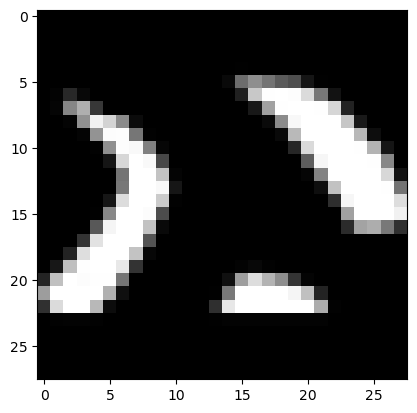

In [47]:
plt.imshow(train_X[10], cmap="gray")

In [48]:
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

def d_sigmoid(z):
    return sigmoid(z)*(1.0 - sigmoid(z))

def mse(a, y):
    return .5*sum((a[i] - y[i])**2 for i in range(10))[0]

def initialize_weights(layers = [784, 60, 60, 10]):
    W = [[0.0]]
    B = [[0.0]]
    for i in range(1, len(layers)):
        w_temp = np.random.randn(layers[i], layers[i-1])*np.sqrt(2/layers[i-1])
        b_temp = np.random.randn(layers[i], 1)*np.sqrt(2/layers[i-1])
    
        W.append(w_temp)
        B.append(b_temp)
    return W, B

In [27]:
W, B = initialize_weights()

def forward_pass(W, B, x, predict_vector = False):
    Z = [[0.0]]
    A = [x]
    L = len(W) - 1
    for i in range(1, L + 1):
        z = W[i] @ A[i-1] + B[i]
        Z.append(z)
        
        a = sigmoid(z)
        A.append(a)
        
    if predict_vector == False:
        return Z, A
    else:
        return A[-1]

def predict(W, B, x):
    _, A = forward_pass(W, B, x)
    return np.argmax(A[-1])

y_hat = forward_pass(W, B, flat_train_X[0], predict_vector=True)

def MSE(W, B, X, y):
    cost = 0.0
    k = 0
    for xi, yi in zip(X, y):
        a = forward_pass(W, B, xi, predict_vector = True)
        cost += mse(a, yi)
        k+=1
    return cost/k

In [28]:
class DenseNetwork(object):
    def __init__(self, layers):
        self.layers = layers
        self.W, self.B = initialize_weights(layers = self.layers)

    def train(self, X_train, y_train, alpha = 0.046, epochs = 4):
        self.errors_ = [MSE(self.W, self.B, X_train, y_train)]
        print(f"Starting Cost = {self.errors_[0]}")

        sample_size = len(X_train)
        L = len(self.layers) - 1
     
        for k in range(epochs):
            
            for xi, yi in zip(X_train, y_train):
                # Use the forward pass function defined before
                # and find the preactivation and postactivation values.
                Z, A = forward_pass(self.W, self.B, xi)

                # Store the errors in a dictionary for clear interpretation
                # of computation of these values.
                deltas = dict()

                output_error = (A[L] - yi)*d_sigmoid(Z[L])
                deltas[L] = output_error

                # Loop from L-1 to 1. Recall the right entry of the range function 
                # is non-inclusive. 
                for i in range(L-1, 0, -1):
                    
                    deltas[i] = (self.W[i+1].T @ deltas[i+1])*d_sigmoid(Z[i])

                # Loop over each hidden layer and the output layer to perform gradient 
                # descent. 
                for i in range(1, L+1):
                    self.W[i] -= alpha*deltas[i] @ A[i-1].T
                    self.B[i] -= alpha*deltas[i]

            # Show the cost over all training examples
            self.errors_.append(MSE(self.W, self.B, X_train, y_train))   
            print(f"{k + 1}-Epoch Cost = {self.errors_[-1]}")
    
    def predict(self, xi):
        depth = len(self.layers)
        _, A = forward_pass(self.W, self.B, xi)
        return np.argmax(A[-1])

In [29]:
net = DenseNetwork(layers = [784, 100, 120, 100, 10])

# Check the mean squared error before training 
print(f"MSE(net.W, net.B, flat_train_X, onehot_train_y) = {MSE(net.W, net.B, flat_train_X, onehot_train_y)} \n")
net.train(flat_train_X, onehot_train_y)


MSE(net.W, net.B, flat_train_X, onehot_train_y) = 1.6419271436263168 

Starting Cost = 1.6419271436263168
1-Epoch Cost = 0.12861987771062058
2-Epoch Cost = 0.11149488928621086
3-Epoch Cost = 0.10422497502657896
4-Epoch Cost = 0.09807589047131851


The cost is become smaller and smaller.

In [30]:
y_pred = []
actual_y = []
for i in range(len(flat_test_X)):
    prediction = net.predict(flat_test_X[i])
    y_pred.append(prediction)
    actual_y.append(np.argmax(onehot_test_y[i]))

/var/folders/sf/smhqk9hx489bblvt_p7gst_w0000gn/T/ipykernel_3944/4076384693.py:2: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0+np.exp(-z))


In [31]:
accuracy_score(y_pred,actual_y)

0.8327

In [32]:
model_report = classification_report(y_pred,actual_y)
print("\nClassification Report")
print(model_report)



Classification Report
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       935
           1       0.96      0.94      0.95      1026
           2       0.74      0.75      0.74       991
           3       0.83      0.84      0.84       990
           4       0.83      0.67      0.74      1249
           5       0.75      0.99      0.85       763
           6       0.55      0.72      0.62       760
           7       0.94      0.86      0.90      1092
           8       0.96      0.92      0.94      1052
           9       0.96      0.85      0.90      1142

    accuracy                           0.83     10000
   macro avg       0.83      0.84      0.83     10000
weighted avg       0.85      0.83      0.84     10000



The accuracy score is 0.8327, which is not bad. 